In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df =pd.read_csv("/Users/da-m1-40/Downloads/market_d.csv")
df

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020-05-18,70.0,75.0,19695.0,281,2810.0,3583,7.01
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020-02-05,160.0,220.0,13560.0,72,1296.0,887,10.46
64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020-08-20,20.0,20.0,6000.0,300,1050.0,900,5.71
64374,NATAL,BJ100,2M,10.0,LEMON,2020-08-18,50.0,80.0,16730.0,277,2770.0,372,6.04


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month in words, day, and year
df['month'] = df['Date'].dt.strftime('%B')  # Month in words
df['day'] = df['Date'].dt.day  # Day
df['year'] = df['Date'].dt.year  # Year

In [4]:
df['avg_price_per_kg'] = pd.to_numeric(df['avg_price_per_kg'], errors='coerce')


In [5]:
Average_value = df[df['Commodities'] == 'TOMATOES-LONG LIFE']['avg_price_per_kg'].mean()
Average_value 

8.107872174590803

In [6]:
df1 = df[df['Commodities'] == 'TOMATOES-LONG LIFE']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          3849 non-null   object        
 1   Container         3849 non-null   object        
 2   Size_Grade        3849 non-null   object        
 3   Weight_Kg         3849 non-null   float64       
 4   Commodities       3849 non-null   object        
 5   Date              3849 non-null   datetime64[ns]
 6   Low_Price         3849 non-null   float64       
 7   High_Price        3849 non-null   float64       
 8   Sales_Total       3849 non-null   float64       
 9   Total_Qty_Sold    3849 non-null   int64         
 10  Total_Kg_Sold     3849 non-null   float64       
 11  Stock_On_Hand     3849 non-null   int64         
 12  avg_price_per_kg  3849 non-null   float64       
 13  month             3849 non-null   object        
 14  day               3849 non-n

In [10]:
# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in df1.select_dtypes(include=['object']).columns:
    df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])

# Convert encoded columns to int
for column in df1.select_dtypes(include=['int64']).columns:
    df1[column] = df1[column].astype(int)

# Print DataFrame with encoded columns as int
print(df1.dtypes)
df1.head(6)

Province                       object
Container                      object
Size_Grade                     object
Weight_Kg                     float64
Commodities                    object
Date                   datetime64[ns]
Low_Price                     float64
High_Price                    float64
Sales_Total                   float64
Total_Qty_Sold                  int64
Total_Kg_Sold                 float64
Stock_On_Hand                   int64
avg_price_per_kg              float64
month                          object
day                             int32
year                            int32
Province_encoded                int64
Container_encoded               int64
Size_Grade_encoded              int64
Commodities_encoded             int64
month_encoded                   int64
dtype: object


/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_38168/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_38168/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_38168/2710871175.py:4: SettingWithCopyWarning: 
A value is tr

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,...,Stock_On_Hand,avg_price_per_kg,month,day,year,Province_encoded,Container_encoded,Size_Grade_encoded,Commodities_encoded,month_encoded
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,...,0,6.67,January,20,2020,6,6,0,0,4
5,TRANSVAAL,AP010,2M,1.0,TOMATOES-LONG LIFE,2020-02-03,8.0,14.0,82576.0,8064,...,485,10.24,February,3,2020,6,3,8,0,3
52,NORTH EASTERN CAPE,BM050,1L,5.0,TOMATOES-LONG LIFE,2020-02-14,35.0,50.0,15970.0,453,...,297,7.05,February,14,2020,5,7,0,0,3
64,TRANSVAAL,KR200,4M,20.0,TOMATOES-LONG LIFE,2020-04-29,120.0,120.0,480.0,4,...,76,6.00,April,29,2020,6,10,19,0,0
89,TRANSVAAL,KR200,2M,20.0,TOMATOES-LONG LIFE,2020-07-10,140.0,140.0,3780.0,27,...,0,7.00,July,10,2020,6,10,8,0,5
91,TRANSVAAL,AP010,1M,1.0,TOMATOES-LONG LIFE,2020-01-08,6.0,6.5,26840.0,4400,...,0,6.10,January,8,2020,6,3,1,0,4


In [11]:
df1["Province"].value_counts()

Province
TRANSVAAL             2860
NORTH EASTERN CAPE     365
CAPE                   256
MPUMALANGA             133
NATAL                  122
KWAZULU NATAL          108
GAUTENG                  5
Name: count, dtype: int64

In [12]:
df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)
df1.head()

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_38168/1635743760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)


,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,year,Province_encoded,Container_encoded,Size_Grade_encoded,Commodities_encoded,month_encoded
3,9.0,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67,20,2020,6,6,0,0,4
5,1.0,2020-02-03,8.0,14.0,82576.0,8064,8064.0,485,10.24,3,2020,6,3,8,0,3
52,5.0,2020-02-14,35.0,50.0,15970.0,453,2265.0,297,7.05,14,2020,5,7,0,0,3
64,20.0,2020-04-29,120.0,120.0,480.0,4,80.0,76,6.00,29,2020,6,10,19,0,0
89,20.0,2020-07-10,140.0,140.0,3780.0,27,540.0,0,7.00,10,2020,6,10,8,0,5


In [13]:
# Method 2: Interquartile Range (IQR)
# Calculate IQR for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean array indicating whether each value is an outlier
outlier_mask_iqr = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df1 = df1[~outlier_mask_iqr]
df1

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,year,Province_encoded,Container_encoded,Size_Grade_encoded,Commodities_encoded,month_encoded
52,5.0,2020-02-14,35.0,50.0,15970.0,453,2265.0,297,7.05,14,2020,5,7,0,0,3
108,6.0,2020-02-22,45.0,45.0,14040.0,312,1872.0,0,7.50,22,2020,6,8,10,0,3
131,6.0,2020-08-18,40.0,50.0,35985.0,789,4734.0,453,7.60,18,2020,6,8,1,0,1
167,5.0,2020-01-14,20.0,20.0,1140.0,57,285.0,0,4.00,14,2020,5,7,3,0,4
173,6.0,2020-02-01,50.0,72.0,9758.0,156,936.0,0,10.43,1,2020,6,8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64032,6.0,2020-08-25,20.0,22.0,6440.0,316,1896.0,468,3.40,25,2020,6,8,15,0,1
64097,6.0,2020-07-18,22.0,45.0,25162.0,1025,6150.0,170,4.09,18,2020,6,8,14,0,5
64132,6.0,2020-05-06,70.0,84.0,37501.0,506,3036.0,360,12.35,6,2020,6,8,1,0,8
64284,6.0,2020-06-03,55.0,65.0,17820.0,312,1872.0,0,9.52,3,2020,6,8,2,0,6


In [14]:
df1.drop(columns=['Date','year','Commodities_encoded'], inplace=True) 

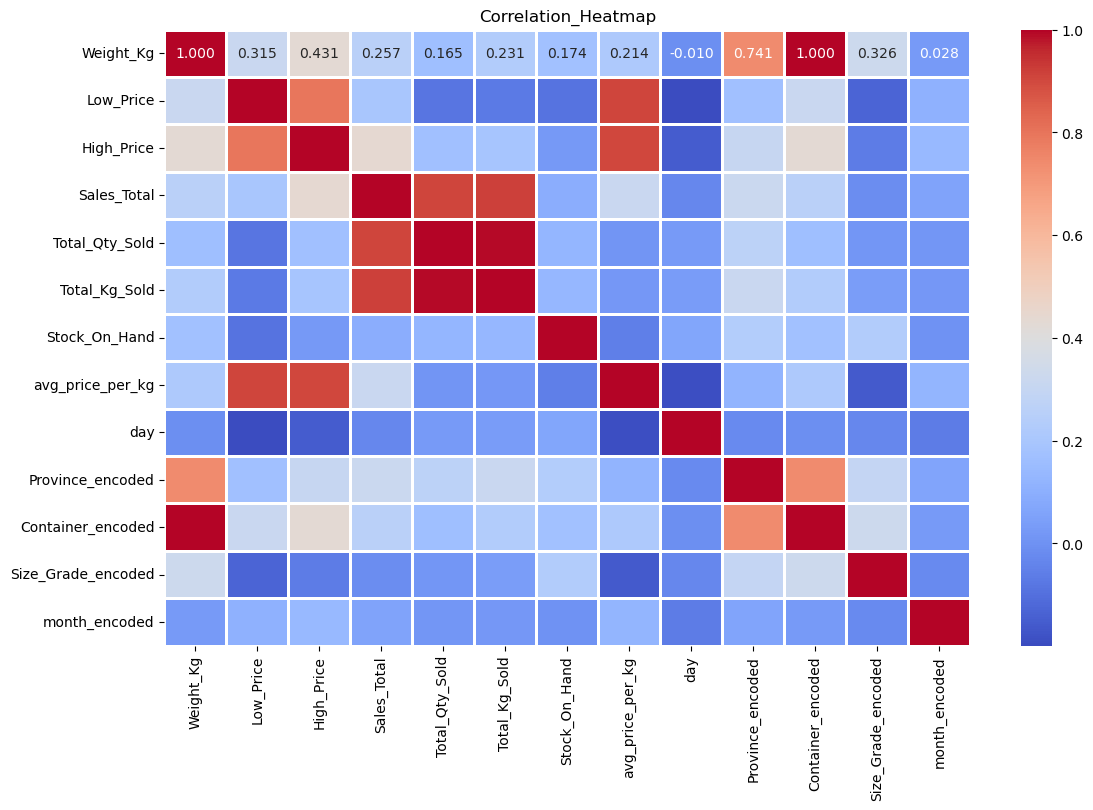

In [15]:
corr = df1.corr()

# Create heatmap with labels
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.9,
            xticklabels=corr.columns, yticklabels=corr.index)
plt.title('Correlation_Heatmap')
plt.show()

In [16]:
df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False)

,avg_price_per_kg
avg_price_per_kg,1.000000
Low_Price,0.908843
High_Price,0.902005
Sales_Total,0.313387
Weight_Kg,0.213510
Container_encoded,0.213510
month_encoded,0.120341
Province_encoded,0.118564
Total_Kg_Sold,0.018163
Total_Qty_Sold,0.007960


Text(0.5, 1.0, 'Features Correlating with Selling_Price')

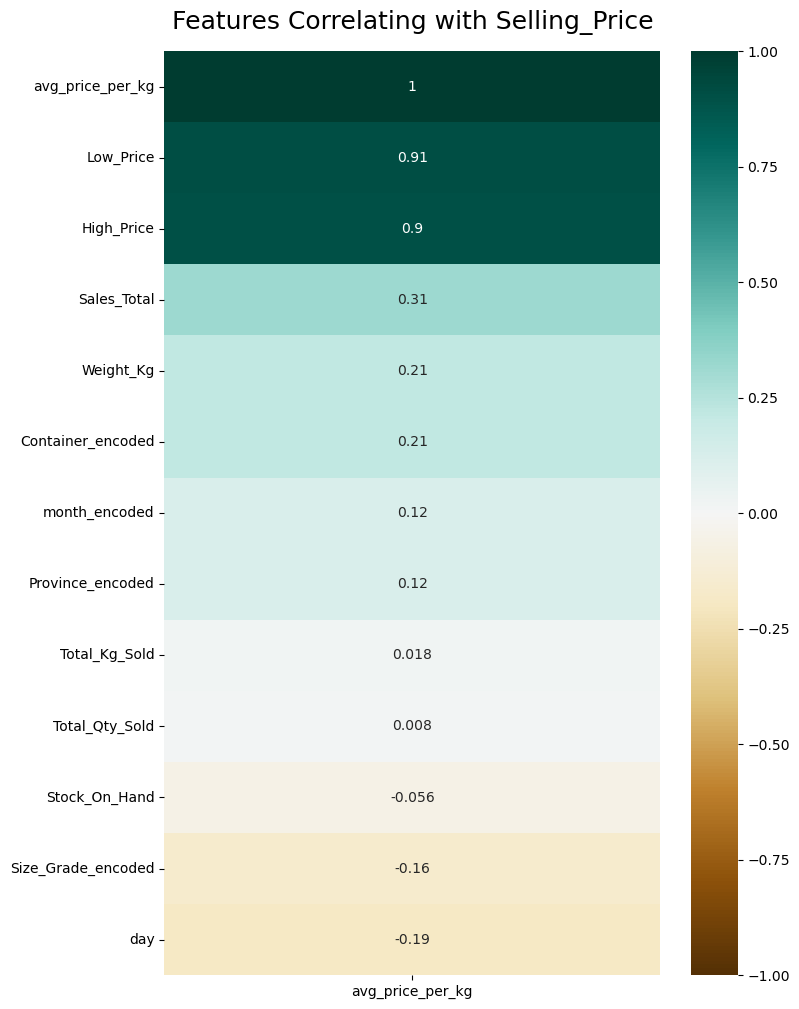

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling_Price', fontdict={'fontsize':18}, pad=16)

<Axes: xlabel='Weight_Kg'>

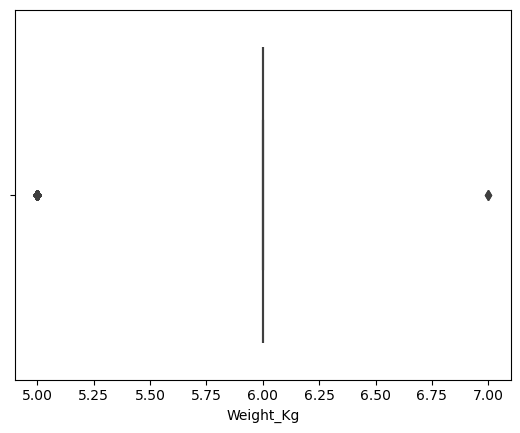

In [18]:
sns.boxplot(x=df1["Weight_Kg"])

<Axes: xlabel='avg_price_per_kg'>

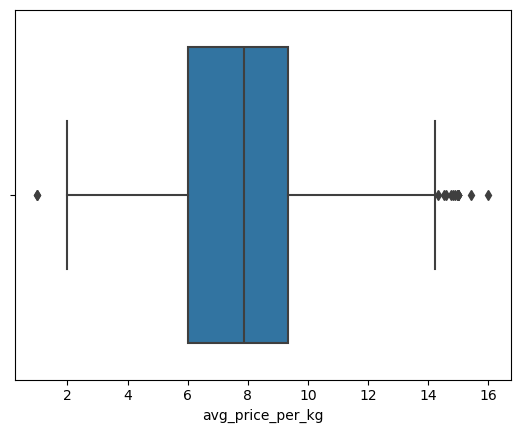

In [19]:
sns.boxplot(x=df1["avg_price_per_kg"])
#sns.boxplot(x=df1["avg_price_per_kg2"])

<Axes: xlabel='High_Price'>

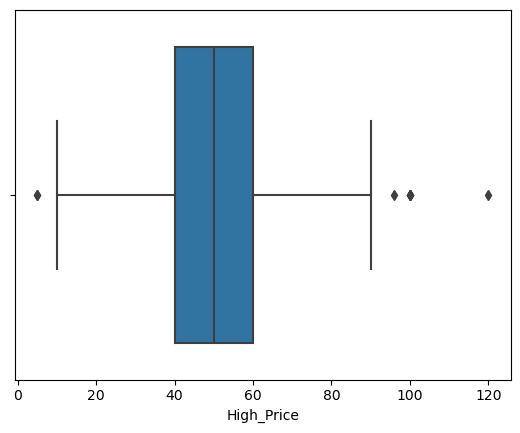

In [20]:
sns.boxplot(x=df1["High_Price"])

<Axes: xlabel='Low_Price'>

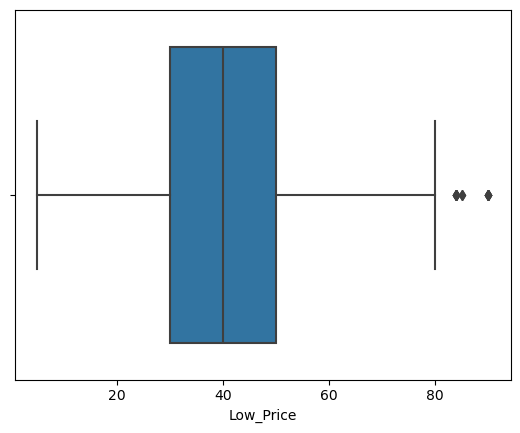

In [21]:
sns.boxplot(x=df1["Low_Price"])

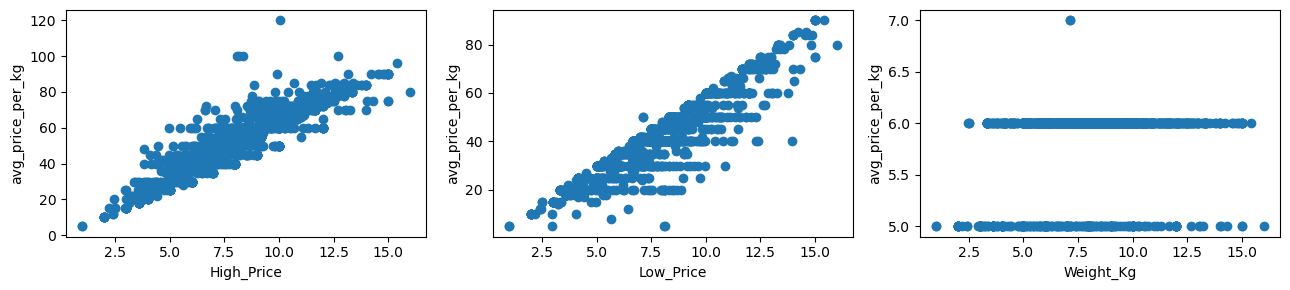

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))
ax[0].scatter(df1['avg_price_per_kg'], df1['High_Price'])
ax[0].set_xlabel('High_Price')
ax[0].set_ylabel('avg_price_per_kg')

ax[1].scatter(df1['avg_price_per_kg'], df1['Low_Price'])
ax[1].set_ylabel('avg_price_per_kg')
ax[1].set_xlabel('Low_Price')

ax[2].scatter(df1['avg_price_per_kg'], df1['Weight_Kg'])
ax[2].set_ylabel('avg_price_per_kg')
ax[2].set_xlabel('Weight_Kg')

plt.tight_layout()
plt.show()

In [23]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg']

In [24]:
X

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,Province_encoded,Container_encoded,Size_Grade_encoded,month_encoded
52,5.0,35.0,50.0,15970.0,453,2265.0,297,14,5,7,0,3
108,6.0,45.0,45.0,14040.0,312,1872.0,0,22,6,8,10,3
131,6.0,40.0,50.0,35985.0,789,4734.0,453,18,6,8,1,1
167,5.0,20.0,20.0,1140.0,57,285.0,0,14,5,7,3,4
173,6.0,50.0,72.0,9758.0,156,936.0,0,1,6,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
64032,6.0,20.0,22.0,6440.0,316,1896.0,468,25,6,8,15,1
64097,6.0,22.0,45.0,25162.0,1025,6150.0,170,18,6,8,14,5
64132,6.0,70.0,84.0,37501.0,506,3036.0,360,6,6,8,1,8
64284,6.0,55.0,65.0,17820.0,312,1872.0,0,3,6,8,2,6


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features


# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)

Selected Features: ['Weight_Kg', 'Low_Price', 'High_Price', 'Province_encoded', 'Container_encoded', 'month_encoded']
Model Coefficients: [-0.6245447   0.08442651  0.08790626  0.0238263  -0.6245447  -0.01152395]


In [26]:
df1.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,Province_encoded,Container_encoded,Size_Grade_encoded,month_encoded
52,5.0,35.0,50.0,15970.0,453,2265.0,297,7.05,14,5,7,0,3
108,6.0,45.0,45.0,14040.0,312,1872.0,0,7.50,22,6,8,10,3


In [27]:
df1.drop(columns=['Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand','Size_Grade_encoded'], inplace=True)

In [28]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg'] 

In [29]:
X

,Weight_Kg,Low_Price,High_Price,day,Province_encoded,Container_encoded,month_encoded
52,5.0,35.0,50.0,14,5,7,3
108,6.0,45.0,45.0,22,6,8,3
131,6.0,40.0,50.0,18,6,8,1
167,5.0,20.0,20.0,14,5,7,4
173,6.0,50.0,72.0,1,6,8,3
...,...,...,...,...,...,...,...
64032,6.0,20.0,22.0,25,6,8,1
64097,6.0,22.0,45.0,18,6,8,5
64132,6.0,70.0,84.0,6,6,8,8
64284,6.0,55.0,65.0,3,6,8,6


In [30]:
y

52        7.05
108       7.50
131       7.60
167       4.00
173      10.43
         ...  
64032     3.40
64097     4.09
64132    12.35
64284     9.52
64365     5.33
Name: avg_price_per_kg, Length: 1283, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print("Training Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

Training Metrics:
Mean Squared Error: 0.366558192483115
Root Mean Squared Error: 0.605440494584823
Mean Absolute Error: 0.40492638530272457
R-squared: 0.9442585154735061


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.31189668515880475
Root Mean Squared Error: 0.55847711247535
Mean Absolute Error: 0.39575764026957433
R-squared: 0.9532159411138698


In [33]:
# Assuming `X_train` is the dataset used for training the model
feature_names = X_train.columns.tolist()
num_features = len(feature_names)

print("Number of features:", num_features)
print("Feature names:", feature_names)

Number of features: 7
Feature names: ['Weight_Kg', 'Low_Price', 'High_Price', 'day', 'Province_encoded', 'Container_encoded', 'month_encoded']


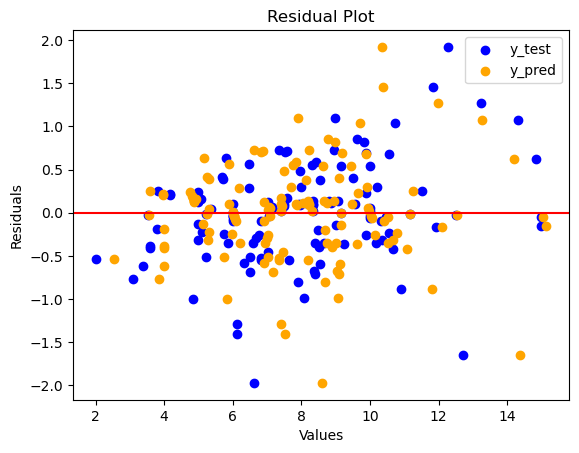

In [34]:
residuals = y_test - y_pred

# Scatter plot of residuals for y_test
plt.scatter(y_test, residuals, color='blue', label='y_test')
# Scatter plot of residuals for y_pred
plt.scatter(y_pred, residuals, color='orange', label='y_pred')

plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

In [35]:
import pickle

model_save_path = "model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

Number of features: 7
Feature names: ['Weight_Kg', 'Low_Price', 'High_Price', 'day', 'Province_encoded', 'Container_encoded', 'month_encoded']

In [36]:
# import pickle

# # Saving the model
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)

# # Loading the model
# with open('model.pkl', 'rb') as file:
#     clf = pickle.load(file)

# # Making a prediction using the loaded model
# prediction = clf.predict([[5, 80, 150, 6, 9, 10,6 ]])

# # Displaying the prediction
# print(prediction)


[19.03175405]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
